# Практическая работа

## 0. Цель:

Ознакомиться с продвинутыми статистическими инструментами для анализа данных и применить полученные навыки на выбранном датасете.

## 1. Импорт библиотек и проверка датасета

In [65]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats
import statsmodels.api as sm
import sklearn.metrics as skl

import plotly.express as px
import plotly.figure_factory as ff

In [4]:
# Открываем файл
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [5]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Датасет практически без пропусков. Есть небольшое количество пропусков только в колонке по "доходу семьи".

Рассмотрим описание наших колонок:

Люди

- ID: ID покупателя
- Year_Birth: год рождения покупателя
- Education: уровень образования покупателя
- Marital_Status: семейный статус покупателя
- Income: годовой доход семьи клиента
- Kidhome: количество детей в доме
- Teenhome: количество тинейджеров в доме
- Dt_Customer: дата регистрации клиента в компании
- Recency: количество дней с момента последней покупки клиента
- Complain: 1, если клиент жаловался в течение последних 2 лет, 0 в противном случае

Продукты

- MntWines: сумма, потраченная на вино за последние 2 года
- MntFruits: сумма, потраченная на фрукты за последние 2 года
- MntMeatProducts: сумма, потраченная на мясо за последние 2 года
- MntFishProducts: сумма, потраченная на рыбу за последние 2 года
- MntSweetProducts: сумма, потраченная на сладости за последние 2 года
- MntGoldProds: умма, потраченная на золото за последние 2 года

Промоушэн

- NumDealsPurchases: количество покупок со скидкой
- AcceptedCmp1: 1, если клиент принял предложение в 1-й кампании, 0 в противном случае
- AcceptedCmp2: 1, если клиент принял предложение во 2-й кампании, 0 в противном случае
- AcceptedCmp3: 1, если клиент принял предложение в 3-й кампании, 0 в противном случае
- AcceptedCmp4: 1, если клиент принял предложение в 4-й кампании, 0 в противном случае
- AcceptedCmp5: 1, если клиент принял предложение в 5-й кампании, 0 в противном случае
- Response: 1, если клиент принял предложение в последней кампании, 0 в противном случае

Место

- NumWebPurchases: количество покупок, совершенных через сайт компании
- NumCatalogPurchases: количество покупок, совершенных через каталог
- NumStorePurchases: количество покупок, совершенных прямо в магазине
- NumWebVisitsMonth: количество посещений сайта за последний месяц

Колонок очень много, имеет смысл некоторые из них удалить. Это связано с тем, что для наших исследований- они не несут в себе большой ценности и пользы.

## 2. Предобработка данных

In [6]:
# Посмотрим общую информацию по колонкам
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Логичнее всего будет перевести колонки Dt_Customer в формат даты. С остальными колонками в плане типа данных все оптимально.

In [7]:
#df['Dt_Customer'].value_counts()
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

/var/folders/zv/rrl2yd7s3_q5bvd434fb2hlh0000gn/T/ipykernel_25871/1124826159.py:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
/var/folders/zv/rrl2yd7s3_q5bvd434fb2hlh0000gn/T/ipykernel_25871/1124826159.py:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
/var/folders/zv/rrl2yd7s3_q5bvd434fb2hlh0000gn/T/ipykernel_25871/1124826159.py:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
/var/folders/zv/rrl2yd7s3_q5bvd434fb2hlh0000gn/T/ipykernel_25871/1124826159.py:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=T

### Смотрим пропуски

In [8]:
print(df['Income'].isna().sum())
df['Income'].isna().sum() / df['Income'].count() * 100

24


1.083032490974729

24 пропуска в колонке о доходах семьи- это 1% данных от общего числа данных. Здесь можно поступить проще и заполнить эти пропуски средним значением по всей колонке, никак не сегментируя. Если возникнут какие-то сложности, то тогда изменим стратегию заполнения.

In [9]:
df['Income'].mean()

52247.25135379061

In [10]:
# Найдем среднее значение по колонке
income_mean = df['Income'].mean()
# заполним им пропуски
df['Income'] = df['Income'].fillna(income_mean)

# df['Income'].isna().sum()
df['Income'].mean()

52247.25135379059

Как мы можем наблюдать, среднее значение по годовому доходу почти никак не изменилось после заполнения пропусков.

### Изучение категориальных и количественных значений

Изучим сначала столбцы, связанные с личными данными людей.

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

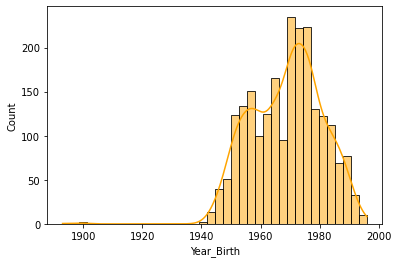

In [11]:
sns.histplot(data=df['Year_Birth'], kde=True, color="orange")

Отлично, видим что гистограмма по годам рождения покупателей распределена по большей степени нормально, с небольшим смещением вправо и небольшим вторым пиком. Нашими клиентами преимущественно являются люди 1970-1980гг рождения.

<AxesSubplot:title={'center':'Education'}>

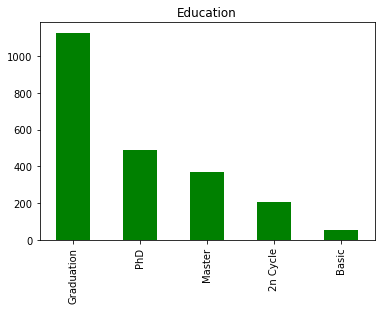

In [12]:
df['Education'].value_counts().plot(kind='bar', color='green', title='Education')

По данному графику можно предположить, что в этой сети делают покупки, в основном, все с высшим образованием, больше половины - покупатели окончили университет, и уверенное второе место занимают покупатели со степенью PhD.

<AxesSubplot:title={'center':'Marital Status'}>

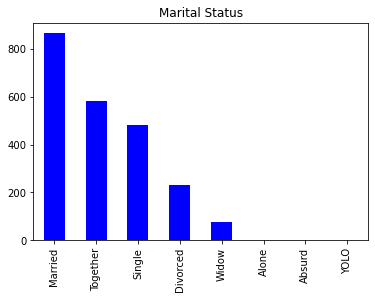

In [13]:
df['Marital_Status'].value_counts().plot(kind='bar', color='blue', title='Marital Status')

Из данной гистограммы видим, что делают покупки, в основном, женатые/замужние пары или те, кто состоит в отношениях. Только на третьем месте те, у кого нет пары и так далее.

<AxesSubplot:title={'center':'Teenhome'}>

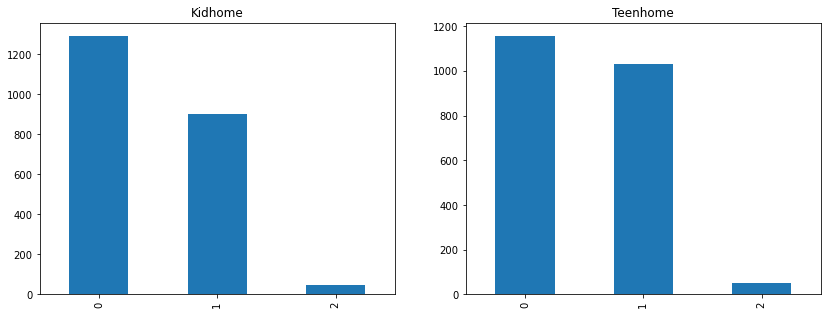

In [14]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title('Kidhome')
df['Kidhome'].value_counts().plot(kind='bar')
plt.subplot(1, 2, 2)
plt.title('Teenhome')
df['Teenhome'].value_counts().plot(kind='bar')

Из этих гистограмм видим, что клиенты в большинстве случаев те, у кого нет детей и/или тинейджеров дома. Последнее место занимают те, у кого максимум 1 ребенок.

<AxesSubplot:xlabel='Recency', ylabel='Count'>

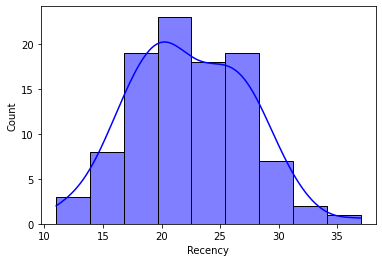

In [15]:
sns.histplot(data=df['Recency'].value_counts(), kde=True, color="blue")

Здесь мы видим, что распределение почти тоже нормальное, по количеству дней, с момента последней покупки в этом магазине. В среднем проходит от 17-27 дней после последней покупки.

In [16]:
df['Complain'].sum()

21

Очень хороший магазин, меньше 1% от всех покупателей жаловались.

На текущем этапе остальные значения не особо важно отдельно проверять, поскольку будем их использовать по мере рассмотрения гипотез.

### Посмотрим на матрицу рассеяния

Изучим, как взаимосвязаны наши числовые данные, и насколько они коррелируют.

array([[<AxesSubplot:xlabel='Year_Birth', ylabel='Year_Birth'>,
        <AxesSubplot:xlabel='Income', ylabel='Year_Birth'>,
        <AxesSubplot:xlabel='Recency', ylabel='Year_Birth'>],
       [<AxesSubplot:xlabel='Year_Birth', ylabel='Income'>,
        <AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='Recency', ylabel='Income'>],
       [<AxesSubplot:xlabel='Year_Birth', ylabel='Recency'>,
        <AxesSubplot:xlabel='Income', ylabel='Recency'>,
        <AxesSubplot:xlabel='Recency', ylabel='Recency'>]], dtype=object)

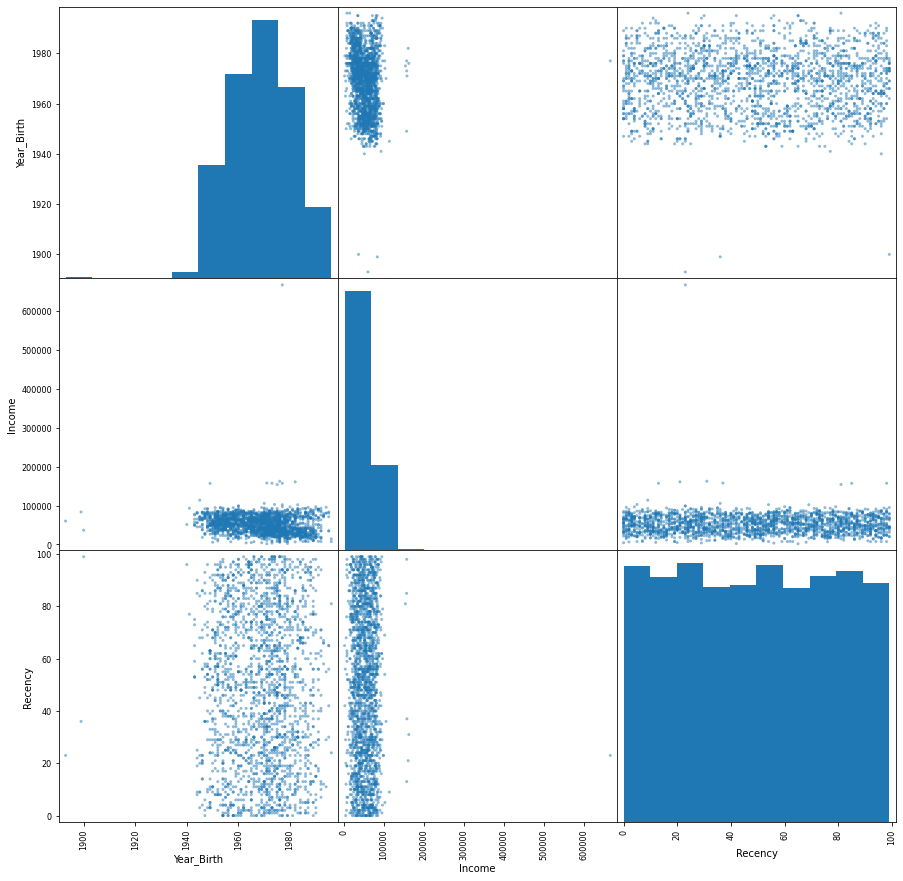

In [71]:
# Строим классическую scatter_matrix
pd.plotting.scatter_matrix(df[['Year_Birth', 'Income', 'Recency']], figsize=(15,15)) 

Видим также нормальность распределения у года рождения, годовая зарплата сконцентрирована в области не превышающей 150к в год, гистограмма по количеству дней с момента последней покупки - достаточно однородна, видим, в диапозоне какого года рождения преимущественно делают покупки в этом супермаркете.

Рассмотрим корреляцию в цвете и изучим: насколько и другие количественные данные коррелирует с нашими, рассмотренными выше.

In [69]:
corrs = df[['Year_Birth', 'Income', 'Recency','MntWines','MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    colorscale='PuRd',
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

Относительно неплохие коэффициенты корреляции у годового дохода семьи и суммы, потраченной на разные типы продуктов. Суммы, потраченные на разные типы продуктов между собой неплохо коррелируют. Напрочь отсутствует корреляция, например, у суммы, потраченной на какой-то продукт и количество дней с момента последней покупки.

### Какой продукт был продан и на какую сумму за 2 года?

У нас есть 6 категорий основных покупок, рассмотрим их отдельно.

<AxesSubplot:title={'center':'Соотношение каждого жанра из топ 5 по средней продолжительности 2010-2022'}, ylabel='value'>

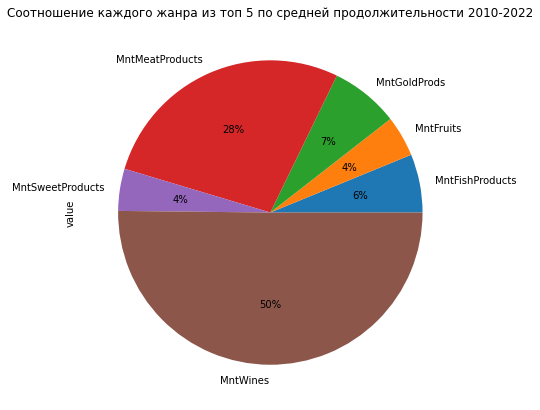

In [17]:
# Выделяем названия исследуемых колонок
sp = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
category = []
value = []

# Создаем два массива данных: категория и сумма
for i in range(len(sp)):
    value.append(df[sp[i]].sum())
    category.append(sp[i])
    
# Создаём новый датафрейм    
df_temp = pd.DataFrame({'category': category, 'value': value})

# Строим круговую диаграмму
df_temp.groupby('category')['value'].sum().plot(
    kind='pie', # тип графика
    figsize=(7,7), # размер графика
    autopct='%1.0f%%', # разметка процентов
    title='Соотношение каждого жанра из топ 5 по средней продолжительности 2010-2022')

Здесь мы видим, что хит продаж по величине потраченных денег клиентами за 2 года - вино. По величине - это целых 50%. На втором месте - мясо (28%). На третьем - золото.

### Попробуем проверить гипотезу непараметрически

**Гипотеза H0:** Есть зависимость между средним доходом семьи и суммой, которую они тратят на вино.

Проклассифицируем сумму потраченную на вино следующим образом: до 150 долларов, от 150 до 300 и больше 300 долларов.

Кроме того, проклассифицируем среднегодовой доход семьи: до 35к, от 35к до 75к, и больше 75к долларов в год.

In [18]:
# Создаём функции для классификации
def wine_value(wine):
    if wine < 150:
        return 'Немного'
    elif 150 <= wine < 300:
        return 'Средне'
    elif 300 <= wine:
        return 'Выше среднего'
    
df['wine'] = df['MntWines'].apply(wine_value)

def income_value(income):
    if income < 35000:
        return 'Эконом'
    elif 35000 <= income < 75000:
        return 'Комфорт'
    elif 75000 <= income:
        return 'Комфорт +'
    
df['new_income'] = df['Income'].apply(income_value)

Группируем по новой категории доходности и смотрим количество купленного вина.

In [19]:
df_temp2_2 = df.groupby('new_income')['wine'].value_counts().unstack()

# пропуск заполним 0, потому что там не было значения; таким образом и возник пропуск.
df_temp2_2 = df_temp2_2.fillna(0)
df_temp2_2

wine,Выше среднего,Немного,Средне
new_income,,,
Комфорт,566.0,495.0,271.0
Комфорт +,303.0,13.0,43.0
Эконом,0.0,537.0,12.0


Применяем специальную функцию, где сможем найти значение хи2.

In [20]:
scipy.stats.chi2_contingency(df_temp2_2, correction = False)

(976.4328370726249,
 4.5688245314632864e-210,
 4,
 array([[516.74464286, 621.40178571, 193.85357143],
        [139.27276786, 167.47991071,  52.24732143],
        [212.98258929, 256.11830357,  79.89910714]]))

In [21]:
# заполним результат в отдельную переменную.
chi = scipy.stats.chi2_contingency(df_temp2_2, correction = False)[0]

Находим критическое значение из расчета альфа = 0.05.

In [22]:
crit_value = scipy.stats.chi2.ppf(0.95, 4)
crit_value

9.487729036781154

Видим, что наше критическое значение во много раз меньше, чем найденное значение хи2, значит нулевую гипотезу отклоняем.

### Проверка гипотезы параметрически

**Гипотеза H0:** средний возраст у тех, кто в официальном браке и свободны - одинаковый.

**Альтернативная гипотеза:** средний возраст разный.

In [23]:
# Определяем массивы данных
married = df[df['Marital_Status'] == 'Married']['Year_Birth']
single = df[df['Marital_Status'] == 'Single']['Year_Birth']

Перед проверкой гипотезы, проверим значения на нормальность распределения. Построим гистограммы распределения.

<AxesSubplot:>

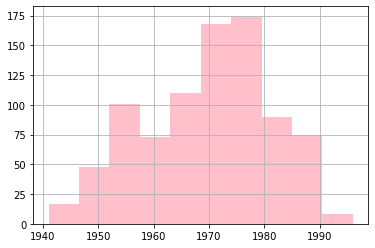

In [24]:
married.hist(color='pink')

<AxesSubplot:>

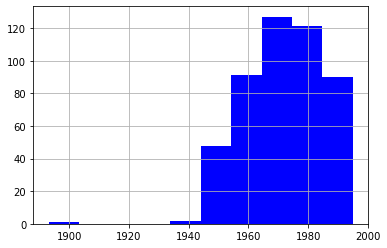

In [25]:
single.hist(color='blue')

Видим, что данные приближены к тому, что они распределены нормально. Первый этап пройден. Теперь сравним не одинаковы ли у нас дисперсии.

In [26]:
# Рассчитываем дисперсии и выводим результат
var1 = married.var()
print(var1)
var2 = single.var()
print(var2)

130.0608222286596
165.6909142310367


Дисперсия отличается, значит мы можем продолжать исследование гипотезы далее. Теперь нам необходимо определить количество степеней свободы (сделаем это с поправкой Уэлча).

In [27]:
# Определили количество данных в каждой выборке
kol1 = len(married)
kol2 = len(single)
print(kol1, kol2)

864 480


Производим сам расчет.

In [28]:
# Находим значения по формулам
v1 = var1 / kol1
v2 = var2 / kol2
welch = int((v1 + v2) ** 2 / (v1 ** 2 / (kol1 - 1) + v2 ** 2 / (kol2 -1)))
print('Кол-во степеней свободы', welch)

Кол-во степеней свободы 893


893 степени свободы означают, что мы берем t-критерий равный 1.9667. Далее рассчитываем стандартную ошибку и средние значения, чтобы получить наш t-критерий.

In [29]:
# Снова рассчитываем все по формулам
s_m1_m2 = np.sqrt(v1 + v2)
print(s_m1_m2)

m1 = married.mean()
m2 = single.mean()
print(m1, m2)

t = (m1 - m2) / s_m1_m2
print(t)

0.7040758224147039
1969.579861111111 1971.4895833333333
-2.7123814814043374


Полученное нами значение говорит, что нулевую гипотезу мы отклоняем, так как наш t-критерий больше, чем критический. То есть средний возраст людей, состоящих в браке, не равен среднему возрасту тех, кто свободен.

### Применим линейную регрессию

Для начала построим обычную линейную регрессию для одного аргумента, то есть y = bx + a. Для этого нам нужно подготовить данные, для которых будем строить линейную регресиию.

Рассмотрим: можно ли предсказать сумму затрат на вино, исходя из годового дохода. Будем отталкиваться от года рождения клиента. По гистограммам выше- мы наблюдали, что у нас есть очень странные года: 1893, 1899, 1900. Они были исключены, ввиду того, что это нерелевантные данные.

In [30]:
# Определим два массива значений, одинаковых по величине
df_n = df[df['Year_Birth'] >= 1940]
wines = df_n.groupby('Year_Birth')['MntWines'].mean()
incomes = df_n.groupby('Year_Birth')['Income'].mean()
# Соберем их в один датафрейм
df_new = pd.concat([wines, incomes], axis=1)
# df_new

Далее идет очень важная часть - необходимо провести предварительную проверку того, насколько целесообразно строить модель линейной регресии для данных, что мы выделили. Сначала посомтрим, насколько коррелирует между собой эти значения.

<AxesSubplot:>

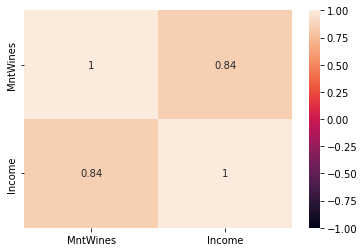

In [31]:
sns.heatmap(df_new.corr(), vmin = -1, vmax = 1, annot = True)

Корреляция, действительно, есть, но она некритическая, можем продолжить. Далее необходимо рассмотреть, есть ли предпосылки для линейной взаимосвязи. Для этого построим парные графики зависимости, снова с помощью готовой функции из библиотеки seaborn.

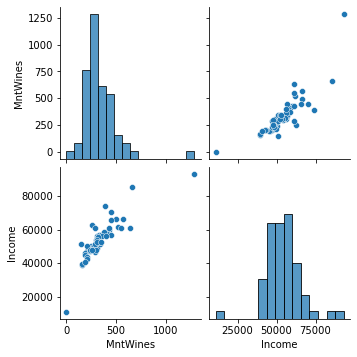

In [32]:
sns.pairplot(df_new)

Таким образом, можно рассмотреть линейную зависимость. Переходим к построению модели линейной регрессии. Попробуем построить линейную регрессию для одного аргумента вручную.

Создадим две пользовательские функции: одна будет рассчитывать коээфициент b, а вторая, соответственно, коэффициент a.

In [33]:
def b_coef(x, y):
    mx = x - x.mean()
    my = y - y.mean()
    return sum(mx * my) / sum(mx**2)

def ba_coef(x, y):
    b = b_coef(x, y)
    a = y.mean() - b * x.mean()
    return b, a

Далее создаем массивы данных для х и у. Применяем наши функции и смотрим на готовое уравнение линейной регрессии.

In [34]:
x = df_new.Income
y = df_new.MntWines
b, a = ba_coef(x, y)
print(f'y = {b}x {a}')

y = 0.012982523013165872x -363.5078647370597


Для наглядности теперь построим график, чтобы изучить наш рузультат, а также рассмотреть, насколько адекватна линия регрессии. Для этого нам нужно рассчитать новое значение у, уже по коэффициентам нашей модели.

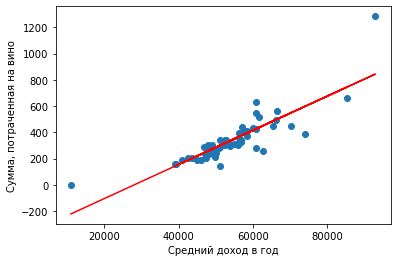

In [35]:
# Записываем расчет нового у
reg = b * x + a

# Строим график
plt.xlabel('Средний доход в год')
plt.ylabel('Сумма, потраченная на вино')
plt.scatter(x, y)
plt.plot(x, reg, color='red')

Используем готовую функцию, чтобы сравнить полученные результаты для коэффициентов и увидеть коэффициент детерминации. Более того, определим статическую значимость.

In [36]:
res = scipy.stats.linregress(x, y)
print(res)

LinregressResult(slope=0.01298252301316588, intercept=-363.5078647370603, rvalue=0.8444041107509851, pvalue=2.9253404861324263e-16, stderr=0.0011208280278870214, intercept_stderr=62.11986917118457)


In [37]:
r_sq = res.rvalue ** 2
print(r_sq)

0.7130183022531619


Исходя из результата, были сделаны следующие выводы: 
1) Высокий коэффициент детерминации 0.713, то есть линия регрессии затрагивает почти 71% значений
2) Исходя из коэффициента coef = 0.0129, как мы и видим, линия наклона не очень сильная. Тем не менее, она наблюдается с прямой зависимостью.
3) Значение средней суммы затрат на вино - статистически значимы.

Рассмотрим, что изменится, если мы добавим еще одну переменную. Добавим значение Recency - количество дней с момента последней покупки клиента. Мы определим, насколько это количество может сказываться на сумме, затрачиваемой на вино.

In [38]:
# Первые два массива у нас уже есть, определим третий

# wines = df_n.groupby('Year_Birth')['MntWines'].mean()
# incomes = df_n.groupby('Year_Birth')['Income'].mean()

recencies = df_n.groupby('Year_Birth')['Recency'].mean()

# Соберем их в один датафрейм
df_new_2 = pd.concat([wines, incomes, recencies], axis=1)
# df_new_2

Проверим на корреляцию и линейность значений, делаем также, как и делали для одного аргумента.

<AxesSubplot:>

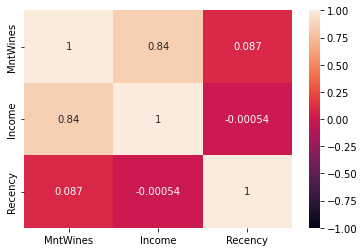

In [39]:
sns.heatmap(df_new_2.corr(), vmin = -1, vmax = 1, annot = True)

Корреляцию между суммой потраченной на вино и средним доходом мы уже видели. Наблюдается хорошая корреляция между суммой, потраченной на вино и средним количеством днем, прошедших с момента последней покупки.

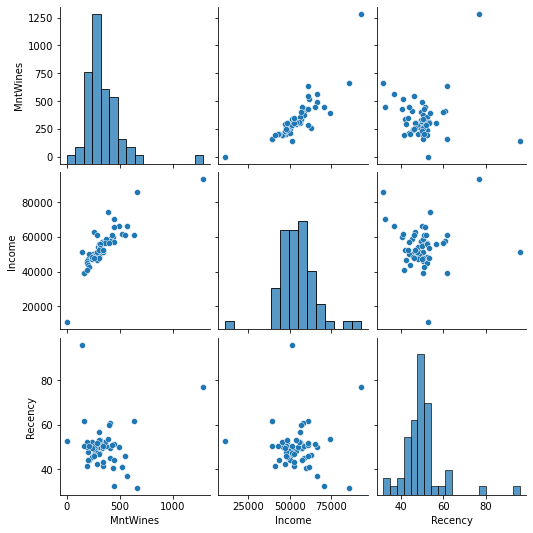

In [40]:
sns.pairplot(df_new_2)

Построим линейную регрессию для двух аргументов уже с помощью специальных методов библиотеки statsmodels.

In [41]:
# определяем значения х и у
x = sm.add_constant(df_new_2.drop('MntWines', axis=1))
y = df_new_2['MntWines']

# Строим модель
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     68.37
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           2.10e-15
Time:                        16:52:51   Log-Likelihood:                -333.58
No. Observations:                  56   AIC:                             673.2
Df Residuals:                      53   BIC:                             679.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -445.8993     92.224     -4.835      0.000    -630.878    -260.921
Income         0.0130      0.001     11.632      0.000       0.011       0.015
Recency        1.6507      1.370      1.205      0.234      -1.098       4.399
==============================================================================
Omnibus:                       24.598   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.719
Skew:                           1.087   Prob(JB):                     2.19e-17
Kurtosis:                       8.306   Cond. No.                     3.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Модель построена. Исходя из значения коэффициента есть прямопропорциональная зависимость. И наш коэффициент детерминации увеличился на 1%. Можно предположить, что среднее количество дней, прошедших с последней покупки - слабо сказывается на прогнозирование средней суммы, которую тратит клиент на вино в зависимости от своего возраста.

### Применим логистическую регрессию

Логистическая регрессия- это по большей степени про категориальные значения, а именно те, что выражены либо единицей, либо нулем. В  датасете как раз есть столбцы, в которых уже есть оценка каких-то признаков в 1 и 0. Возьмем оттуда Response, которая говорит нам о том, что клиент принял предложение в последней кампании (1) , (0) в противном случае. В ручную создадим следующую категорию: семья ли это без несовершенолетних в доме или у них есть все-таки дети/тинейджеры дома. Самый явный минус, это то, что мы не знаем, о чем речь в этой "кампании". В связи с этим, ограничимся следующим: либо принято предложение, либо нет.

Возьмем за новый датасет тех, кто женат.

In [42]:
df_log = df[df['Marital_Status'] == 'Married']

Далее создадим функцию, чтобы создать новый столбец, исходя из определенных нами критериев

In [43]:
df_log['children'] = df_log['Kidhome'] + df_log['Teenhome']

df_log['children'] = df_log['children'].apply(lambda child: 0 if child == 0 else 1)
#df_log

/var/folders/zv/rrl2yd7s3_q5bvd434fb2hlh0000gn/T/ipykernel_25871/568516064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['children'] = df_log['Kidhome'] + df_log['Teenhome']
/var/folders/zv/rrl2yd7s3_q5bvd434fb2hlh0000gn/T/ipykernel_25871/568516064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['children'] = df_log['children'].apply(lambda child: 0 if child == 0 else 1)


Теперь у нас есть две категории, по которым будем искать наши коэффиценты.

Сначала сгруппируем наши данные.

In [44]:
df_log.groupby('children')['Response'].value_counts().unstack()

Response,0,1
children,,
0,188,42
1,578,56


Теперь рассчитаем вероятности для лог. формулы

In [45]:
p_1_response = 56 / (56 + 42)
p_0_response = 1 - p_1_response
odds_1_response = p_1_response / p_0_response
print(odds_1_response)

1.3333333333333333


Этот коэффициент говорит о том, что если у клиента есть дети, то вероятность того, что он примет предложение кампании на 30% выше, чем если бы у него не было детей.

Теперь рассмотрим обратную ситуацию: кто с какой вероятностью не примет предложение кампании. Сделать нужно то же самое, но для другой колонки.

In [46]:
p_1_noresponse = 578 / (578 + 188)
p_0_noresponse = 1 - p_1_noresponse
odds_1_noresponse = p_1_noresponse / p_0_noresponse
print(odds_1_noresponse)

3.074468085106383


Здесь выводы больше интереса для наблюдений: шанс, что пары с детьми не примут предложение компании- почти 3:1. 

Можно сделать предположение, что данная "кампания" была адресована явно не семейным парам с детьми, а для какого-то другого портрета клиентов.

## Итог работы

- Был проведен исследовательский анализ выбранного датасета.
- В датасете был примерно 1% пропусков по среднегодовой доходности клиента. Мною были заполнены эти пропуски средним значением в той же категории по всему датасету.
- Распределение по году рождения клиентов было очень близко к нормальному, просматривался небольшой второй пик, возможно этот магазин продает что-то интересное для двух портретов людей, но больше именно для рожденных в 70-80хх годах. 
- Клиент этого магазина в большинстве случаев имеет следующие характеристики:  с законченным высшим образованием и женатые/замужние клиенты
- Клиенты либо без детей, либо без подростков в семье.
- В среднем, проходит от 17 до 27 дней после последней покупки клиента.
- Вино было продано на большую сумму, чем, что-либо другое; второе место- это мясо; третье - золото, с небольшим отрывом от других категорий.
- Была сделана гипотеза о том, что "Есть зависимость между средним доходом семьи и суммой, которую они тратят на вино", непараметрическим способом она была отклонена.
- Была разработана другая гипотеза, возможность, которой мы проверяли с помощью t-теста "Средний возраст клиентов, кто в официальном браке и свободны - одинаковый" - она была отклонена
- Построили две линейной регрессии, предворительно все их проверив на объективность построения моделей: Первая модель была с одним предиктором, насколько линейно можно спрогнозировать сумму, на которую будет покупаться вино от среднего дохода в год. Получилось уравнение y = 0.013x -363.508. Вторая модель зависела уже от нескольких переменных: добавили к первой модели среднее количество дней с момента последней покупки. Сравнивая полноту построенных моделей, можно отметить, что коэффициент детерминации увеличился на 1%, после добавления второго предиктора. Можно предположить, что среднее количество дней, прошедших с последней покупки - слабо сказывается на прогнозирование средней суммы, что тратит клиент на вино в зависимости от своего среднегодового дохода.
- Построили логистическую регрессию для того, чтобы рассмотреть вероятность и шансы принятия или отклонение предложения кампании в зависимости от того, есть ли у клиента дети. Выяснили, что шанс 30% того, что клиент с детьми примет предложение и 300% шанс, что пары с детьми не примут предложение. Из чего мы сделали гипотезу, что данная кампания проводилась не для данной категории клиентов, либо наличие детей не учитывалось.